### Imports

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

In [7]:
from models.pinn import prepare_SOSI_fixed, prepare_SOSI_random, prepare_MOMI_fixed
import keras_core as keras
import numpy as np
from models.analytical import SingleOccupationSingleIsotope, MultiOccupationMultiIsotope
import matplotlib.pyplot as plt

# Single-Occupation, Single Isotope, fixed matrix model

## Training

### No physics loss

In [23]:
basic_model, basic_loss, (x_basic,y_basic) = prepare_SOSI_fixed(physics_weight=0)
basic_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=basic_loss,
)
basic_model.fit(
    x_basic,
    y_basic,
    batch_size=2**12,
    epochs=10,
    shuffle=True,
    validation_split=0.15,
)


Epoch 1/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1968 - val_loss: 0.0098
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0083 - val_loss: 0.0052
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0071 - val_loss: 0.0058
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0094 - val_loss: 0.0069
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0073 - val_loss: 0.0051
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0065 - val_loss: 0.0052
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0060 - val_loss: 0.0100
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0075 - val_loss: 0.0077
Epoch 9/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0071 - val_loss: 0.0070
Epoch 10/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0071 - val_loss: 0.0087


In [38]:
basic_model.save("trained_models/SOSI_fixed.keras")

### Physics loss

In [22]:
basic_model_physics, basic_loss_physics, (x_basic_physics,y_basic_physics) = prepare_SOSI_fixed(physics_weight=0.1)
basic_model_physics.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=basic_loss_physics,
)
basic_model_physics.fit(
    x_basic_physics,
    y_basic_physics,
    batch_size=2**12,
    epochs=10,
    shuffle=True,
    validation_split=0.15,
)

Epoch 1/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2950 - val_loss: 0.0739
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0749 - val_loss: 0.0725
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0729 - val_loss: 0.0747
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0736 - val_loss: 0.0782
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0746 - val_loss: 0.0716
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0727 - val_loss: 0.0720
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0745 - val_loss: 0.0725
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0718 - val_loss: 0.0726
Epoch 9/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0732 - val_loss: 0.0704
Epoch 10/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0723 - val_loss: 0.0737


In [39]:
basic_model_physics.save("trained_models/SOSI_fixed_physics.keras")

## Evaluation

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


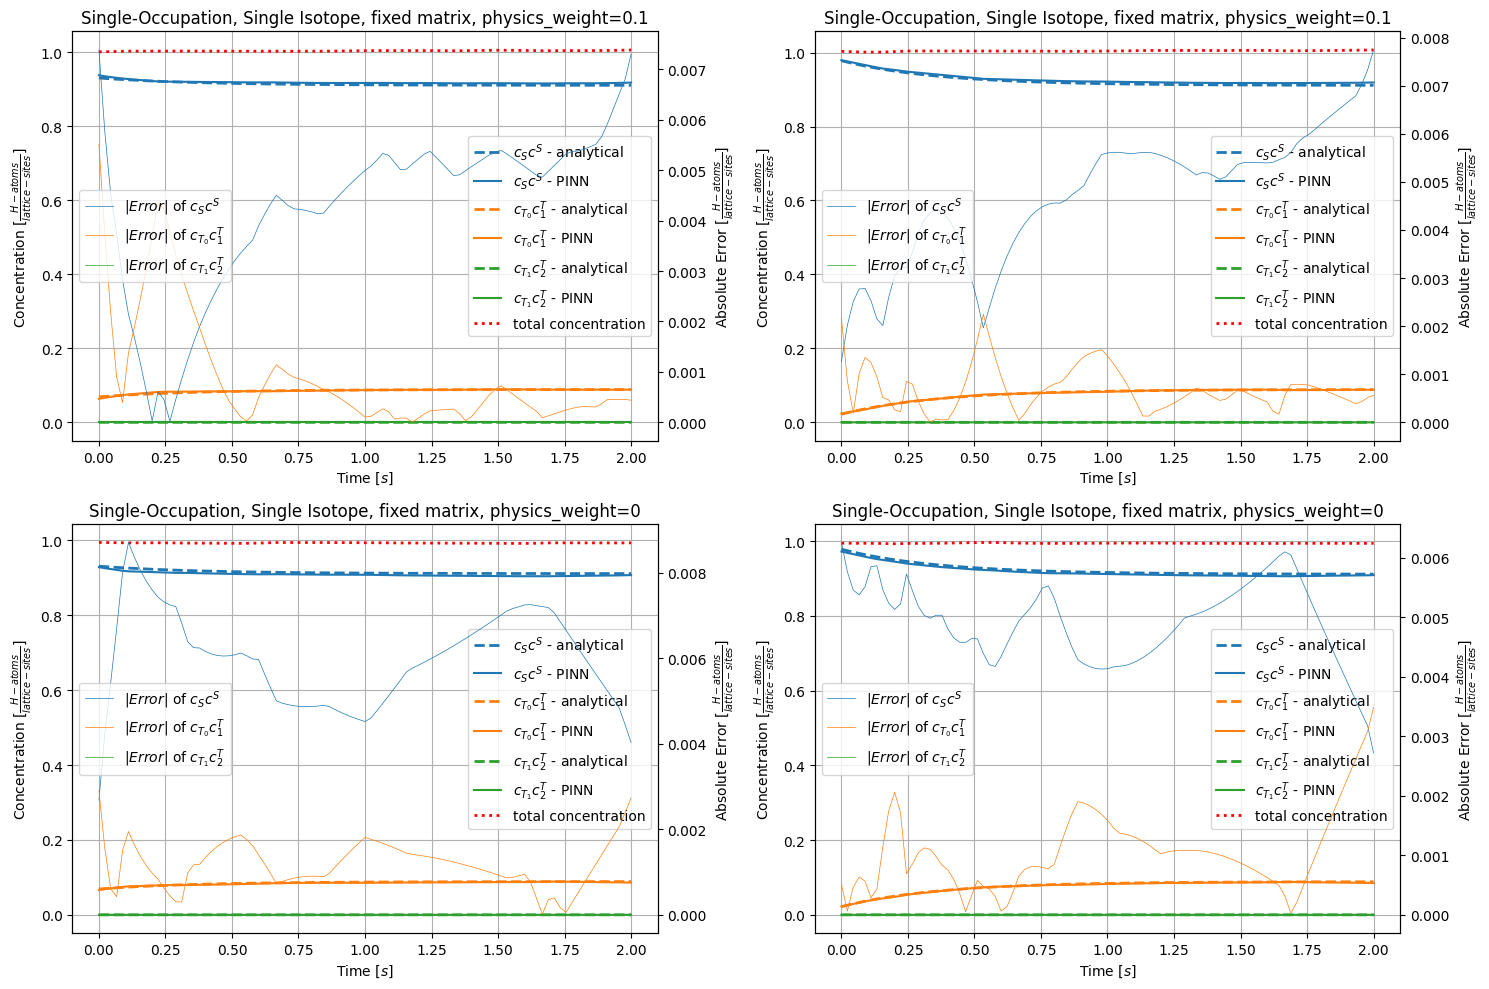

In [55]:
basic_model = keras.models.load_model(
    "trained_models/SOSI_fixed.keras",
    compile=False,
)
basic_model_physics = keras.models.load_model(
    "trained_models/SOSI_fixed_physics.keras",
    compile=False,
)
first_seed = 1
second_seed = 50

# this seed is just to recover the matrices from training
np.random.seed(1)
analytical_model = SingleOccupationSingleIsotope()

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
np.random.seed(first_seed)
analytical_model.evaluate(basic_model_physics)

plt.subplot(2, 2, 2)
np.random.seed(second_seed)
analytical_model.evaluate(basic_model_physics)

plt.subplot(2, 2, 3)
np.random.seed(first_seed)
analytical_model.evaluate(basic_model)

plt.subplot(2, 2, 4)
np.random.seed(second_seed)
analytical_model.evaluate(basic_model)

plt.show()

# Single-Occupation, Single Isotope, random matrix model

## Training

### No physics loss

In [37]:
full_model, full_loss, (x_full,y_full) = prepare_SOSI_random(physics_weight=0)
full_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=full_loss,
)
full_model.fit(
    x_full,
    y_full,
    batch_size=2**12,
    epochs=10,
    shuffle=True,
    validation_split=0.15,
)


Epoch 1/10
1038/1038 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - loss: 0.3275 - val_loss: 0.1040
Epoch 2/10
1038/1038 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - loss: 0.1764 - val_loss: 0.0868
Epoch 3/10
1038/1038 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - loss: 0.1562 - val_loss: 0.0777
Epoch 4/10
1038/1038 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 0.1522 - val_loss: 0.0671
Epoch 5/10
1038/1038 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - loss: 0.1454 - val_loss: 0.0811
Epoch 6/10
1038/1038 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - loss: 0.1396 - val_loss: 0.0742
Epoch 7/10
1038/1038 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - loss: 0.1380 - val_loss: 0.1070
Epoch 8/10
1038/1038 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - loss: 0.1332 - val_loss: 0.0783
Epoch 9/10
1038/1038 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - loss: 0.1313 - val_loss: 0.0831
Epoch 10/10
1038/1038 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - loss: 0.1295 - val_loss: 0.0919


In [53]:
full_model.save('trained_models/SOSI_random.keras')

### Physics loss

In [54]:
full_model_physics, full_loss_physics, (x_full_physics,y_full_physics) = prepare_SOSI_random(physics_weight=0.1)
full_model_physics.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=full_loss_physics,
)
full_model_physics.fit(
    x_full_physics,
    y_full_physics,
    batch_size=2**12,
    epochs=10,
    shuffle=True,
    validation_split=0.15,
)

Epoch 1/10
1038/1038 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - loss: 0.3644 - val_loss: 0.1546
Epoch 2/10
1038/1038 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 0.2355 - val_loss: 0.1673
Epoch 3/10
1038/1038 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 0.2276 - val_loss: 0.1433
Epoch 4/10
1038/1038 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 0.2154 - val_loss: 0.1299
Epoch 5/10
1038/1038 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - loss: 0.2087 - val_loss: 0.1346
Epoch 6/10
1038/1038 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - loss: 0.2051 - val_loss: 0.1329
Epoch 7/10
1038/1038 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - loss: 0.2025 - val_loss: 0.1457
Epoch 8/10
1038/1038 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - loss: 0.1975 - val_loss: 0.1415
Epoch 9/10
1038/1038 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - loss: 0.1975 - val_loss: 0.1677
Epoch 10/10
1038/1038 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - loss: 0.1937 - val_loss: 0.1442


In [56]:
full_model_physics.save('trained_models/SOSI_random_physics.keras')

## Evaluation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step


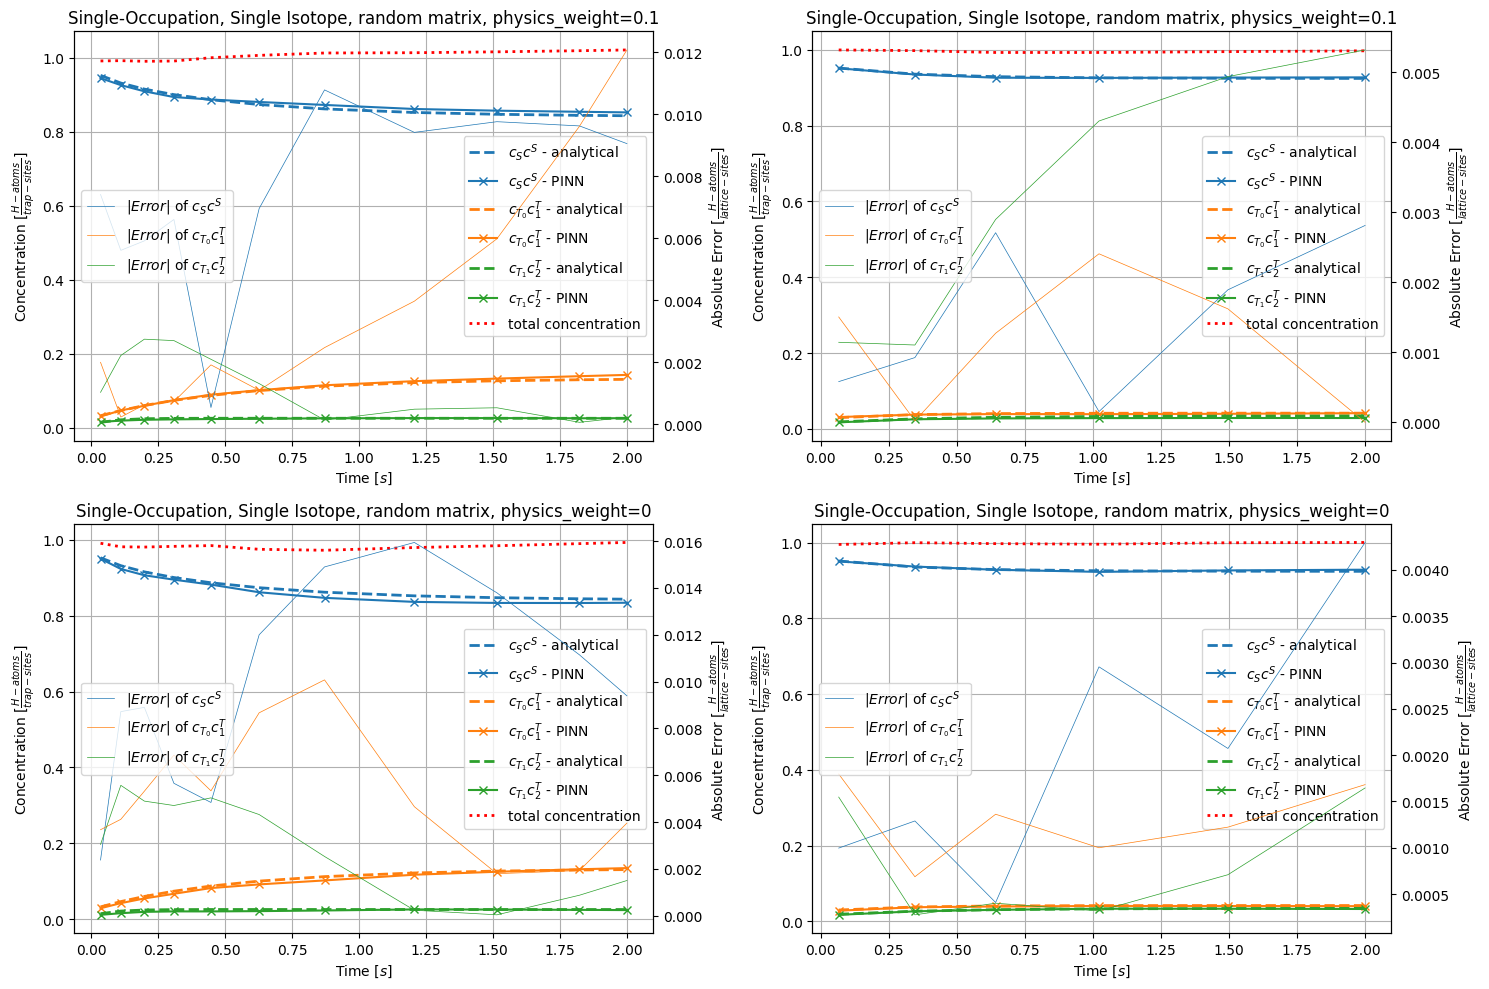

In [65]:
full_model = keras.models.load_model(
    "trained_models/SOSI_random.keras",
    compile=False,
)
full_model_physics = keras.models.load_model(
    "trained_models/SOSI_random_physics.keras",
    compile=False,
)

first_seed = 42
second_seed = 50

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
np.random.seed(first_seed)
SingleOccupationSingleIsotope().evaluate(full_model_physics,include_params = True)

plt.subplot(2, 2, 2)
np.random.seed(second_seed)
SingleOccupationSingleIsotope().evaluate(full_model_physics,include_params = True)

plt.subplot(2, 2, 3)
np.random.seed(first_seed)
SingleOccupationSingleIsotope().evaluate(full_model,include_params = True)

plt.subplot(2, 2, 4)
np.random.seed(second_seed)
SingleOccupationSingleIsotope().evaluate(full_model,include_params = True)

plt.show()

# Multi-Occupation, Multi-Isotope, fixed matrix model

## Training

### No physics loss

In [48]:
momi_fixed_model, momi_fixed_loss, (x_momi_fixed,y_momi_fixed) = prepare_MOMI_fixed(physics_weight=0)
momi_fixed_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=momi_fixed_loss,
)
momi_fixed_model.fit(
    x_momi_fixed,
    y_momi_fixed,
    batch_size=2**12,
    epochs=10,
    shuffle=True,
    validation_split=0.15,
)


Epoch 1/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0383 - val_loss: 0.0101
Epoch 2/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0088 - val_loss: 0.0063
Epoch 3/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0058 - val_loss: 0.0043
Epoch 4/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0038 - val_loss: 0.0022
Epoch 5/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 6/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 7/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 8/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 9/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 10/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0019 - val_loss: 0.0017


In [49]:
momi_fixed_model.save('trained_models/MOMI_fixed.keras')

### Physics loss

In [50]:
momi_fixed_physics_model, momi_fixed_physics_loss, (x_momi_fixed_physics,y_momi_fixed_physics) = prepare_MOMI_fixed(physics_weight=0.1)
momi_fixed_physics_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=momi_fixed_physics_loss,
)
momi_fixed_physics_model.fit(
    x_momi_fixed_physics,
    y_momi_fixed_physics,
    batch_size=2**12,
    epochs=10,
    shuffle=True,
    validation_split=0.15,
)


Epoch 1/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1278 - val_loss: 0.1008
Epoch 2/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0999 - val_loss: 0.0976
Epoch 3/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0975 - val_loss: 0.0960
Epoch 4/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0959 - val_loss: 0.0947
Epoch 5/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0946 - val_loss: 0.0939
Epoch 6/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0942 - val_loss: 0.0938
Epoch 7/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0941 - val_loss: 0.0934
Epoch 8/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0938 - val_loss: 0.0933
Epoch 9/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0936 - val_loss: 0.0937
Epoch 10/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0936 - val_loss: 0.0939


In [51]:
momi_fixed_physics_model.save('trained_models/MOMI_fixed_physics.keras')

## Evaluation

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 129us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


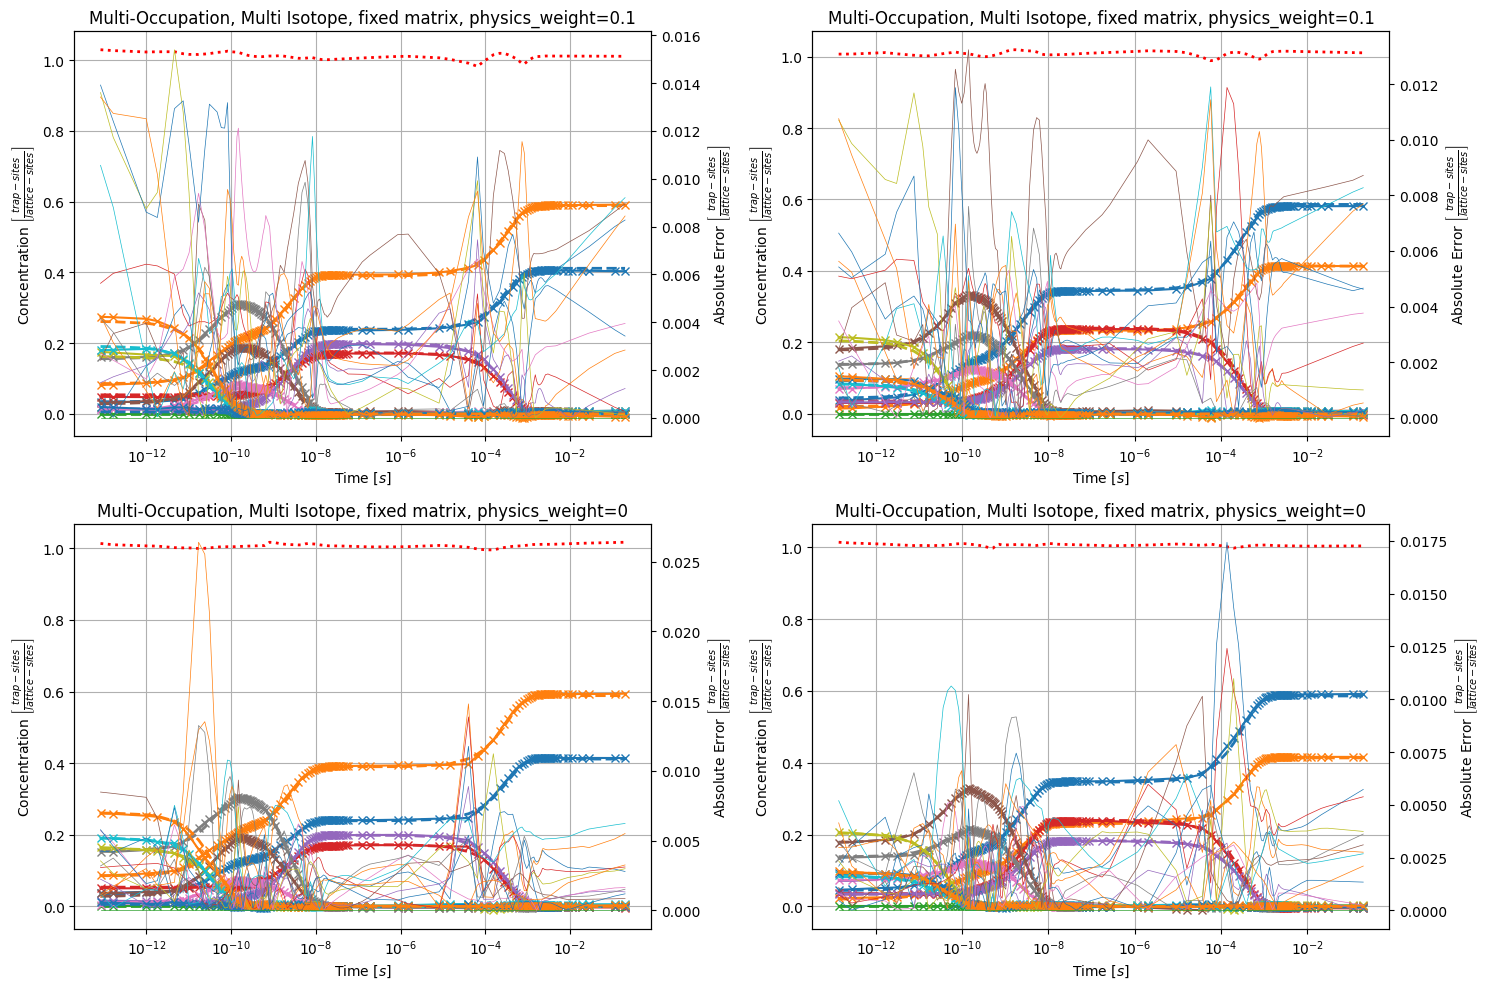

In [67]:
momi_fixed_model = keras.models.load_model(
    "trained_models/MOMI_fixed.keras",
    compile=False,
)
momi_fixed_physics_model = keras.models.load_model(
    "trained_models/MOMI_fixed_physics.keras",
    compile=False,
)

first_seed = 42
second_seed = 50

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
np.random.seed(first_seed)
MultiOccupationMultiIsotope().evaluate(momi_fixed_physics_model, legend = False)

plt.subplot(2, 2, 2)
np.random.seed(second_seed)
MultiOccupationMultiIsotope().evaluate(momi_fixed_physics_model, legend = False)

plt.subplot(2, 2, 3)
np.random.seed(first_seed)
MultiOccupationMultiIsotope().evaluate(momi_fixed_model, legend = False)

plt.subplot(2, 2, 4)
np.random.seed(second_seed)
MultiOccupationMultiIsotope().evaluate(momi_fixed_model, legend = False)

plt.show()